In [1]:
from qiskit import *

In [2]:
from qiskit.tools.visualization import plot_bloch_multivector

In [3]:
#Testing imports
qc = QuantumCircuit(1,1)
qc.x(0)
sim = Aer.get_backend('statevector_simulator')
result = execute(qc , backend = sim).result()
statevector = result.get_statevector()
print(statevector)


Statevector([-6.123234e-17+7.49879891e-33j,  1.000000e+00+0.00000000e+00j],
            dims=(2,))


In [4]:
%matplotlib inline


C:\Users\HP\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


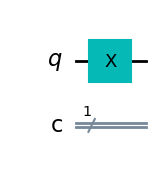

In [5]:
qc.draw(output = 'mpl')

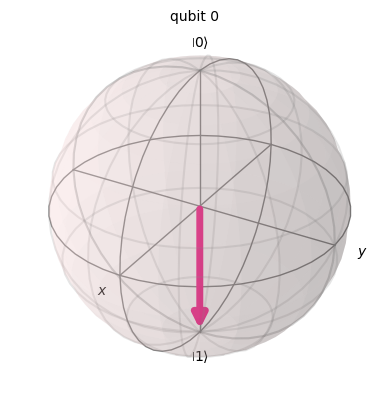

In [6]:
plot_bloch_multivector(statevector)
#Plotting on bloch Sphere

In [7]:
qc.measure([0],[0])

Enter secret Number in Decimal:128


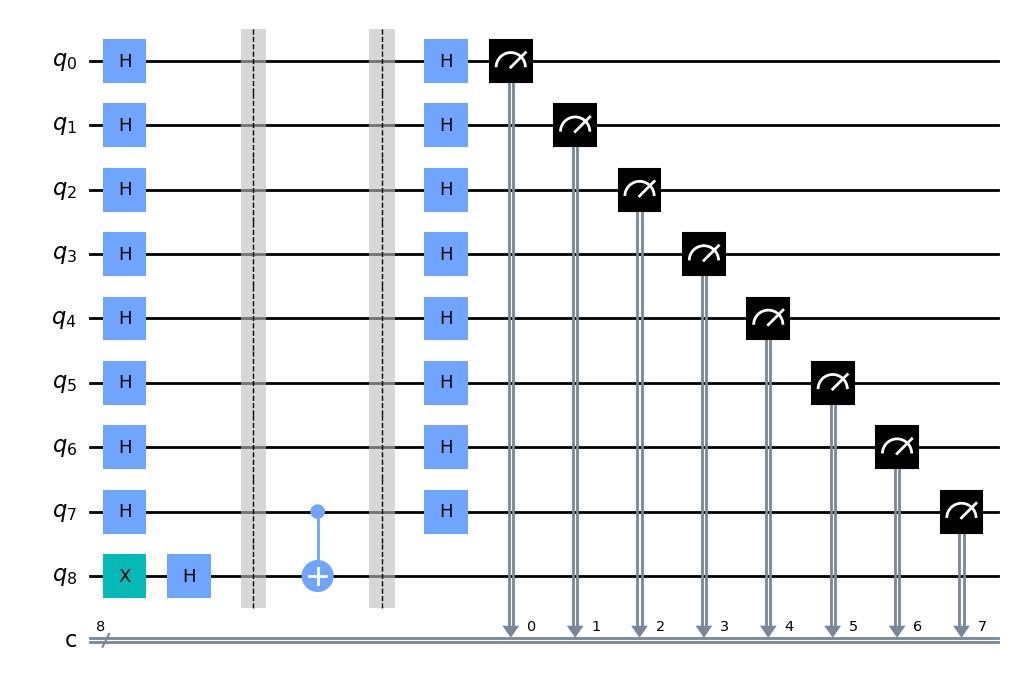

In [8]:
#Bernstein_vazirani_Algorithm
secret = str(bin(int(input("Enter secret Number in Decimal:")))).lstrip("0b")
l = len(secret)
circuit = QuantumCircuit(l+1,l)
for i in range(l):
    circuit.h([i])
circuit.x(l)
circuit.h(l)
circuit.barrier()
for j in range(l):
    if int(secret[j]) == 1:
        circuit.cx(l-1-j,l)
circuit.barrier()
for i in range(l):
    circuit.h([i])
circuit.measure([i for i in range(l)],[i for i in range(l)])
circuit.draw(output = 'mpl')

In [9]:
sim = Aer.get_backend('qasm_simulator')

In [10]:
result = execute(circuit,backend = sim, sots = 1).result()
count = result.get_counts()
print(count)

{'10000000': 1024}


In [1]:
pip install pennylane

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pennylane


In [3]:
import pennylane as qml
from pennylane_qchem.qchem import MolecularData

# Define the molecule (Hydrogen molecule)
mol = MolecularData(geometry=[['H', [0.0, 0.0, 0.0]], ['H', [0.0, 0.0, 0.735]]],
                     charge=0,
                     mult=1,
                     basis='sto-3g',
                     units='angstrom',
                     filename='h2')

# Load the molecular data
mol.load()

# Get the qubit Hamiltonian
h, qubits = mol.get_qubit_hamiltonian()

# Define the device and the ansatz
dev = qml.device("default.qubit", wires=qubits)
ansatz = qml.templates.StronglyEntanglingLayers(qubits, 2)

# Define the cost function
def cost(params):
    return qml.ExpvalCost(ansatz, h, dev)(params)

# Optimize the circuit
opt = qml.GradientDescentOptimizer(stepsize=0.4)
params = qml.init.strong_ent_layers_normal(qubits, 2)
steps = 100

for i in range(steps):
    params = opt.step(cost, params)

# Obtain the final energy
final_energy = cost(params)
print("Final optimized energy:", final_energy)


ModuleNotFoundError: No module named 'pennylane_qchem'

In [5]:
pip install pennylane_qchem


     ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.2 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.2 kB ? eta -:--:--
     -------------------- ----------------- 30.7/56.2 kB 217.9 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/56.2 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 56.2/56.2 kB 267.5 kB/s eta 0:00:00
  Obtaining dependency information for openfermion>=1.0 from https://files.pythonhosted.org/packages/40/4c/e42774cbf3eb998250f2e120ab7e21d433cd6a55bc68534e257da4e7a377/openfermion-1.

  error: subprocess-exited-with-error
  
  pip subprocess to install backend dependencies did not run successfully.
  exit code: 1
  
  [268 lines of output]
    Obtaining dependency information for Cython>=0.29.15 from https://files.pythonhosted.org/packages/30/ca/d68432adc1bf90b450c4d9aaf7cbadae50bca0cad1686b1976498abe2eca/Cython-3.0.5-cp311-cp311-win_amd64.whl.metadata
    Using cached Cython-3.0.5-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
    Using cached pkgconfig-1.5.5-py3-none-any.whl (6.7 kB)
    Using cached numpy-1.19.3.zip (7.3 MB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'error'
    error: subprocess-exited-with-error
  
    Preparing metadata (pyproject.toml) did not run successfull

In [8]:
pip install qiskit.aqua

  Using cached qiskit_aqua-0.9.5-py3-none-any.whl (2.1 MB)
  Using cached qiskit_ignis-0.7.1-py3-none-any.whl (198 kB)
  Using cached dlx-1.0.4.tar.gz (5.5 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached docplex-2.25.236.tar.gz (633 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached h5py-3.2.1.tar.gz (368 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  pip subprocess to install backend dependencies did not run successfully.
  exit code: 1
  
  [268 lines of output]
    Obtaining dependency information for Cython>=0.29.15 from https://files.pythonhosted.org/packages/30/ca/d68432adc1bf90b450c4d9aaf7cbadae50bca0cad1686b1976498abe2eca/Cython-3.0.5-cp311-cp311-win_amd64.whl.metadata
    Using cached Cython-3.0.5-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
    Using cached pkgconfig-1.5.5-py3-none-any.whl (6.7 kB)
    Using cached numpy-1.19.3.zip (7.3 MB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'error'
    error: subprocess-exited-with-error
  
    Preparing metadata (pyproject.toml) did not run successfull

In [3]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
from IPython.display import clear_output
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
num_samples = 100  # Number of samples
eps = 1.0  # Noise level
lb, ub = 0, 10  # Lower and upper bounds

# Creating the dataset similar to the second one
true_states = np.linspace(lb, ub, num=num_samples) + 0.5 * np.random.normal(size=num_samples)
measurements = true_states + eps * np.random.normal(size=num_samples)

# Splitting the dataset into data and labels
X = measurements.reshape(num_samples, 1)  # Features
y = true_states.reshape(num_samples, 1)   # Labels
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QNNCircuit(feature_map=feature_map, ansatz=ansatz)

# construct QNN
regression_estimator_qnn = EstimatorQNN(circuit=qc)


C:\Users\HP\anaconda3\envs\sop\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


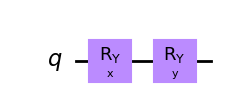

In [4]:
qc.draw(output = 'mpl')

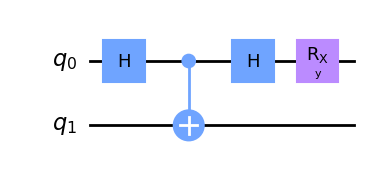

In [6]:
qc = QuantumCircuit(2)

# Parameters for the feature map and ansatz
param_x = Parameter("x")
param_y = Parameter("y")

# Create Rx and Ry gate approximations using H and CNOT gates
# Rx gate approximation
qc.h(0)
qc.cx(0, 1)  # Apply CNOT gate
qc.h(0)

# Ry gate approximation
qc.rx(param_y, 0)
qc.draw(output='mpl')